In [186]:
import json
import matplotlib.pyplot as plt
import os
import json
import pandas as pd
import numpy as np

# Load the JSON data
stimu_name = 'pp_20250518_agent18_step40'
file_path = ["D:\ppXinyue\\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\\results\checkpoints", stimu_name]
json_file_path = os.path.join(file_path[0], file_path[1], 'conversation.json')

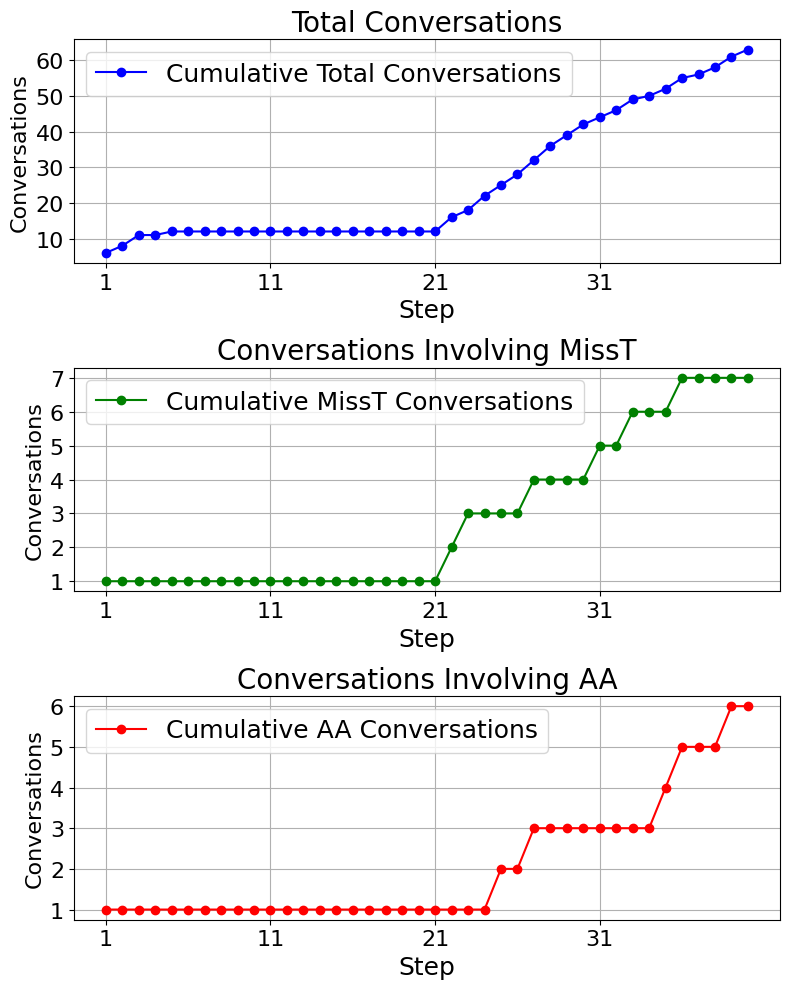

In [187]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Read JSON data
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Initialize dictionaries to store counts
total_conversations = {}
miss_t_conversations = {}
aa_conversations = {}

# Function to calculate step from time_slot
def time_slot_to_step(time_slot):
    # Parse the time_slot (e.g., '20250512-09:00') to datetime
    dt = datetime.strptime(time_slot, '%Y%m%d-%H:%M')
    # Reference time: 20250512-09:00 is step 0
    ref_time = datetime.strptime('20250512-09:00', '%Y%m%d-%H:%M')
    # Calculate minutes difference
    minutes_diff = (dt - ref_time).total_seconds() / 60
    # Each step is 3 minutes
    step = int(minutes_diff / 3)
    return step

# Iterate through each time slot in the data to map to steps
step_counts = {}  # Step -> (total, miss_t, aa)
for time_slot, conversations in data.items():
    step = time_slot_to_step(time_slot)
    if step < 0 or step > 39:  # Limit to 40 steps (0 to 39)
        continue
    
    total_count = len(conversations)
    miss_t_count = 0
    aa_count = 0
    
    # Check each conversation for MissT and AA
    for conv in conversations:
        conv_key = list(conv.keys())[0]
        participants = [p.split('@')[0].strip() for p in conv_key.split(' -> ')]
        # print(participants)
        if 'MissT' in participants:
            miss_t_count += 1
        if 'AA' in participants:
            aa_count += 1
    
    # Store counts for this step
    if step in step_counts:
        prev_total, prev_miss_t, prev_aa = step_counts[step]
        step_counts[step] = (prev_total + total_count, prev_miss_t + miss_t_count, prev_aa + aa_count)
    else:
        step_counts[step] = (total_count, miss_t_count, aa_count)

# Fill all 40 steps (0 to 39) with 0 if no conversations
total_counts = []
miss_t_counts = []
aa_counts = []
for step in range(40):
    if step in step_counts:
        total, miss_t, aa = step_counts[step]
    else:
        total, miss_t, aa = 0, 0, 0
    total_counts.append(total)
    miss_t_counts.append(miss_t)
    aa_counts.append(aa)

# Calculate cumulative counts
cumulative_total = [sum(total_counts[:i+1]) for i in range(40)]
cumulative_miss_t = [sum(miss_t_counts[:i+1]) for i in range(40)]
cumulative_aa = [sum(aa_counts[:i+1]) for i in range(40)]

# Define steps for x-axis (showing Step 1 to Step 40)
steps_to_show = range(1, 41)  # Steps 1 to 40
step_labels = [f"{i}" for i in steps_to_show]

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))

# Plot Cumulative Total Conversations
ax1.plot(step_labels, cumulative_total, marker='o', color='b', label='Cumulative Total Conversations')
ax1.set_title('Total Conversations')
ax1.set_xlabel('Step')
ax1.set_ylabel('Conversations')
ax1.grid(True)
ax1.set_xticks(range(0, 40, 10))  # Show every 5 steps for readability
ax1.set_xticklabels(step_labels[::10])
ax1.legend()

# Plot Cumulative MissT Conversations
ax2.plot(step_labels, cumulative_miss_t, marker='o', color='g', label='Cumulative MissT Conversations')
ax2.set_title('Conversations Involving MissT')
ax2.set_xlabel('Step')
ax2.set_ylabel('Conversations')
ax2.grid(True)
ax2.set_xticks(range(0, 40, 10))  # Show every 5 steps for readability
ax2.set_xticklabels(step_labels[::10])
ax2.legend()

# Plot Cumulative AA Conversations
ax3.plot(step_labels, cumulative_aa, marker='o', color='r', label='Cumulative AA Conversations')
ax3.set_title('Conversations Involving AA')
ax3.set_xlabel('Step')
ax3.set_ylabel('Conversations')
ax3.grid(True)
ax3.set_xticks(range(0, 40, 10))  # Show every 5 steps for readability
ax3.set_xticklabels(step_labels[::10])
ax3.legend()

# font size adjustment
for label in (ax1.get_xticklabels() + ax1.get_yticklabels() +
               ax2.get_xticklabels() + ax2.get_yticklabels() +
               ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set_fontsize(16)
# Set the font size for titles and labels
ax1.title.set_fontsize(20)
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(16)
ax2.title.set_fontsize(20)
ax2.xaxis.label.set_fontsize(18)
ax2.yaxis.label.set_fontsize(16)
ax3.title.set_fontsize(20)
ax3.xaxis.label.set_fontsize(18)
ax3.yaxis.label.set_fontsize(16)
# legend font size
ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('cumulative_conversations_plot.png')
plt.close()

[0.03922, 0.05229, 0.0719, 0.0719, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.07843, 0.10458, 0.11765, 0.14379, 0.15686, 0.16993, 0.18954, 0.20915, 0.21569, 0.22876, 0.23529, 0.23529, 0.24183, 0.24183, 0.24183, 0.2549, 0.2549, 0.26144, 0.28105, 0.28758]


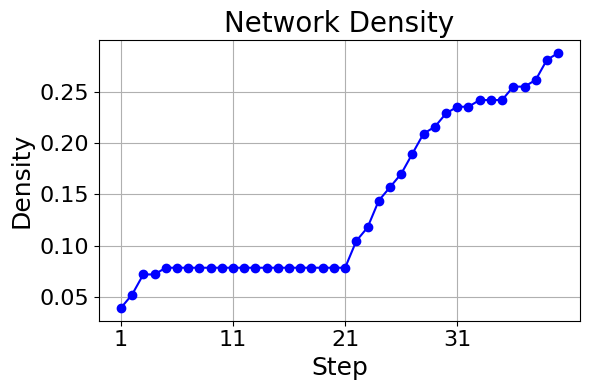

In [188]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Read JSON data
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Number of nodes (|V| = 4)
V = 18
denominator = V * (V - 1)  # 4 * 3 = 12

# Initialize dictionary to store densities and set for cumulative edges
densities = {}
cumulative_edges = set()

# Function to calculate step from time_slot
def time_slot_to_step(time_slot):
    dt = datetime.strptime(time_slot, '%Y%m%d-%H:%M')
    ref_time = datetime.strptime('20250512-09:00', '%Y%m%d-%H:%M')
    minutes_diff = (dt - ref_time).total_seconds() / 60
    step = int(minutes_diff / 3)
    return step

# Function to extract valid participants
def extract_participants(participant_str):
    # Split by ' -> ' and take only the first two parts before '@' if present

    parts = [participant_str.split('@')[0].strip() for participant_str in participant_str.split(' -> ')]
    # print(parts)
    if len(parts) >= 2:
        # Extract names before '@' or take the whole part
        p1 = parts[0].split('@')[0].strip()
        p2 = parts[1].split('@')[0].strip()
        return [p1, p2]
    return []

# Process time slots and map to steps
step_densities = {}
for time_slot in sorted(data.keys()):
    step = time_slot_to_step(time_slot)
    if step < 0 or step > 39:  # Limit to 140 steps (0 to 139)
        continue
    
    conversations = data[time_slot]
    
    # Process each conversation in the current time slot
    for conv in conversations:
        # Get the conversation participants (e.g., "MissT -> BB @ the Ville，操场，幼儿园")
        participant_str = list(conv.keys())[0]
        participants = extract_participants(participant_str)
        # Ensure exactly 2 participants for a valid edge
        if len(participants) == 2:
            edge = tuple(sorted(participants))
            cumulative_edges.add(edge)
        else:
            print(f"Warning: Skipping invalid conversation {participant_str} with {len(participants)} valid participants")

    # Number of cumulative edges (|E|)
    E = len(cumulative_edges)
    
    # Calculate cumulative density: η = 2|E| / |V|(|V|-1)
    density = (2 * E) / denominator
    density = density if density > 0 else 0  # Avoid negative or invalid density
    density = round(density, 5)
    
    # Store density for this step
    step_densities[step] = density

# Fill all 140 steps (0 to 139) with densities
density_values = []
for step in range(40):
    if step in step_densities:
        density_values.append(step_densities[step])
    else:
        density_values.append(density_values[-1] if density_values else 0)
print(density_values)
# Define steps for x-axis (showing Step 1 to Step 140)
steps_to_show = range(1, 41)  # Steps 1 to 140
step_labels = [str(i) for i in steps_to_show]

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(step_labels, density_values, marker='o', color='b', label='Cumulative Network Density')
plt.title('Network Density')
plt.xlabel('Step')
plt.ylabel('Density')
plt.grid(True)
plt.xticks(ticks=range(0, 40, 10), labels=step_labels[::10])
# plt.legend()
# font size adjustment
for label in (plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    label.set_fontsize(16)
# Set the font size for title and labels
plt.gca().title.set_fontsize(20)
plt.gca().xaxis.label.set_fontsize(18)
plt.gca().yaxis.label.set_fontsize(18)
# legend font size
# plt.legend(fontsize=18)


plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('cumulative_network_density.png')
plt.close()

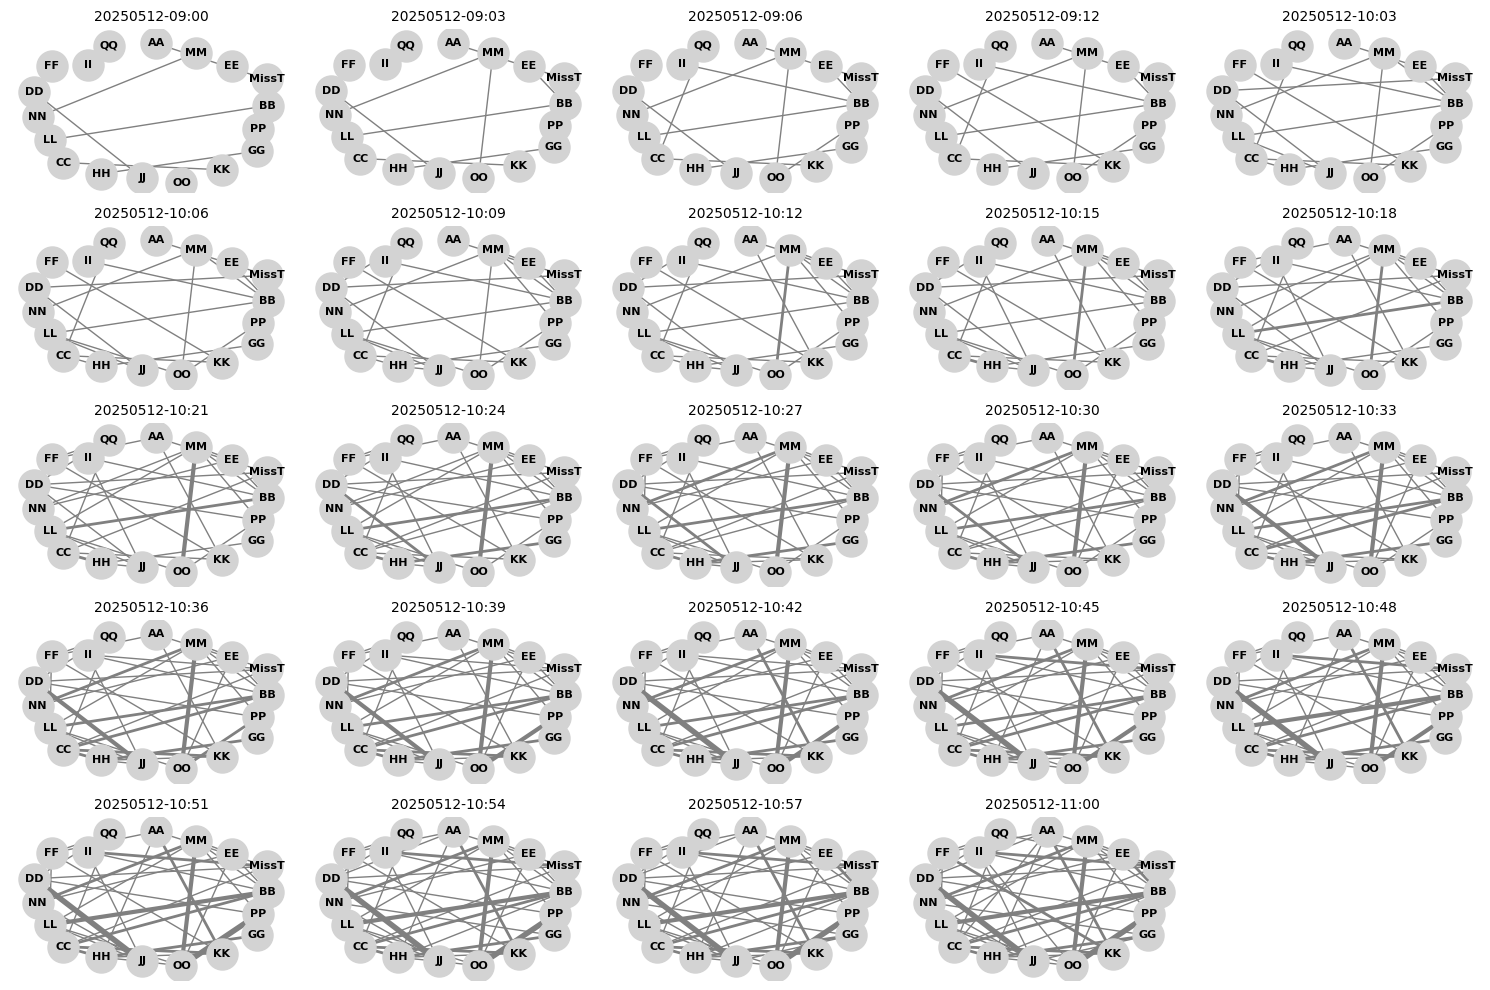

In [127]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import math

with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# List of all nodes (18 characters)
nodes = ['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 
         'JJ', 'KK', 'LL', 'MM', 'NN', 'OO', 'PP', 'QQ', 'MissT']
# nodes = ['AA','BB','QQ','MissT']

# Initialize dictionary to store cumulative edge weights (conversation counts)
cumulative_edge_weights = {}

# Sort time slots chronologically
time_slots = sorted(data.keys())

# Compute fixed node positions using spring layout
G_temp = nx.Graph()
G_temp.add_nodes_from(nodes)
pos = nx.spring_layout(G_temp, seed=42)  # Fixed seed for consistent positions

# Calculate grid size for subplots (3 rows, ceiling of N/3 columns)
n_time_slots = len(time_slots)
n_cols = math.ceil(n_time_slots / 5)
n_rows = 5

# Create a large figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten axes for easier iteration

# Iterate through each time slot
for idx, time_slot in enumerate(time_slots):
    conversations = data[time_slot]
    
    # Update edge weights for current time slot
    for conv in conversations:
        # Get the conversation key (e.g., "DD -> CC @ the Ville，操场，幼儿园")
        conv_key = list(conv.keys())[0]
        # Extract participant names by splitting on " -> " and taking the first part of each
        participants = [p.split('@')[0].strip() for p in conv_key.split(' -> ')]
        edge = tuple(sorted(participants))  # Undirected edge
        # Increment conversation count for this edge
        cumulative_edge_weights[edge] = cumulative_edge_weights.get(edge, 0) + 1
    
    # Create a new graph
    G = nx.Graph()
    # Add all nodes
    G.add_nodes_from(nodes)
    # Add edges with weights
    for edge, count in cumulative_edge_weights.items():
        G.add_edge(edge[0], edge[1], weight=count)
    
    # Get edge weights for thickness
    weights = [G[u][v]['weight'] * 1.0 for u, v in G.edges()]  # Scale thickness
    
    # Get the current subplot
    ax = axes[idx]
    
    # Draw the graph with fixed positions
    nx.draw(G, pos, ax=ax, with_labels=True, labels={node: node for node in nodes},
            node_color='lightgrey', node_size=500, font_size=8, font_weight='bold',
            edge_color='gray', width=weights)
    
    # Set subplot title
    ax.set_title(time_slot, fontsize=10)
    
# Hide any unused subplots
for idx in range(len(time_slots), len(axes)):
    axes[idx].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('cumulative_network_graphs.png')

In [196]:
# 简化版本：保留健壮性判断，不使用 argparse
import json
import os
from pathlib import Path

# 直接指定参数
BASE_PATH = r"D:\\ppXinyue\\2022_inclusion\\ppCNtown\\GenerativeAgentsCN\\generative_agents\\results\\checkpoints"
STIMU_NAME = "pp_20250518_agent18_step40"
OUTPUT_DIR = "output"
TOP_POIGNANT_JSON = "top_poignant_nodes.json"

top_poignant_nodes = {}

def convert_json_to_text_simple(json_file_path, output_path, character):
    try:
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        with open(json_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        if 'docstore/data' not in data or 'docstore/metadata' not in data:
            print(f"Error: {json_file_path} missing 'docstore/data' or 'docstore/metadata'")
            return

        lines = []

        docstore_data = data['docstore/data']
        docstore_metadata = data['docstore/metadata']

        if not docstore_data:
            print(f"Warning: {json_file_path} has no nodes in 'docstore/data'")
            lines.append("No nodes found in this file")

        max_poignancy = float('-inf')
        top_node = None

        for node_id in sorted(docstore_data):
            node_data = docstore_data[node_id].get('__data__', {})
            metadata = node_data.get('metadata', {})
            text = node_data.get('text', '')
            doc_hash = docstore_metadata.get(node_id, {}).get('doc_hash', '')

            # 记录 poignancy 最高的节点
            try:
                poignancy = float(metadata.get('poignancy', '-inf'))
                if poignancy > max_poignancy:
                    max_poignancy = poignancy
                    top_node = {
                        "character": character,
                        "node_id": node_id,
                        "poignancy": poignancy,
                        "metadata": metadata,
                        "text": text,
                        "doc_hash": doc_hash
                    }
            except ValueError:
                pass

            lines.append(f"===== Node: {node_id} =====")
            lines.append(f"Type: {metadata.get('node_type', '')}")
            lines.append(f"Subject: {metadata.get('subject', '')}")
            lines.append(f"Predicate: {metadata.get('predicate', '')}")
            lines.append(f"Object: {metadata.get('object', '')}")
            lines.append(f"Address: {metadata.get('address', '')}")
            lines.append(f"Poignancy: {metadata.get('poignancy', '')}")
            lines.append(f"Election: {metadata.get('election', '')}")
            lines.append(f"AAfriend: {metadata.get('AAfriend', '')}")
            lines.append(f"flapflap: {metadata.get('flapflap', '')}")
            lines.append(f"flapeye: {metadata.get('flapeye', '')}")
            lines.append(f"Create: {metadata.get('create', '')}")
            lines.append(f"Expire: {metadata.get('expire', '')}")
            lines.append(f"Access: {metadata.get('access', '')}")
            lines.append(f"Doc Hash: {doc_hash}")
            lines.append("Text:")
            lines.append(text)
            lines.append("")

        if top_node:
            top_poignant_nodes[character] = top_node

        with open(output_path, 'w', encoding='utf-8') as f:
            f.write('\n'.join(lines))

        print(f"Converted: {json_file_path} -> {output_path}")

    except Exception as e:
        print(f"Error processing {json_file_path}: {e}")

def batch_process():
    characters = ['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 
                  'JJ', 'KK', 'LL', 'MM', 'NN', 'OO', 'PP', 'QQ', 'MissT']

    stimu_path = Path(BASE_PATH) / STIMU_NAME / 'storage'
    if not stimu_path.exists():
        print(f"Error: Directory {stimu_path} does not exist")
        return

    for char in characters:
        json_file = stimu_path / char / 'associate' / 'docstore.json'
        output_file = Path(OUTPUT_DIR) / STIMU_NAME / f"{char}.txt"
        convert_json_to_text_simple(json_file, output_file, char)

    # 保存每个人 poignancy 最高的节点
    top_output_file = Path(OUTPUT_DIR) / STIMU_NAME / TOP_POIGNANT_JSON
    os.makedirs(top_output_file.parent, exist_ok=True)
    with open(top_output_file, 'w', encoding='utf-8') as f:
        json.dump(top_poignant_nodes, f, indent=2, ensure_ascii=False)
    print(f"Saved top poignancy nodes to {top_output_file}")

def main():
    batch_process()

if __name__ == '__main__':
    main()

Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp_20250518_agent18_step40\storage\AA\associate\docstore.json -> output\pp_20250518_agent18_step40\AA.txt
Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp_20250518_agent18_step40\storage\BB\associate\docstore.json -> output\pp_20250518_agent18_step40\BB.txt
Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp_20250518_agent18_step40\storage\CC\associate\docstore.json -> output\pp_20250518_agent18_step40\CC.txt
Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp_20250518_agent18_step40\storage\DD\associate\docstore.json -> output\pp_20250518_agent18_step40\DD.txt
Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp_20250518_agent18_step40\storage\EE\associate\docstore

In [197]:
import json
import os
from pathlib import Path
import csv
from datetime import datetime, timedelta

# Configuration
BASE_PATH = r"D:\\ppXinyue\\2022_inclusion\\ppCNtown\\GenerativeAgentsCN\\generative_agents\\results\\checkpoints"
STIMU_NAME = "pp_20250518_agent18_step40"
OUTPUT_DIR = "output"

def parse_timestamp(timestamp_str):
    """Parse timestamp string to datetime object."""
    try:
        return datetime.strptime(timestamp_str, '%Y%m%d-%H:%M:%S')
    except (ValueError, TypeError):
        return None

def calculate_step(create_timestamp):
    """Calculate step based on create timestamp relative to 20250512-09:00:00."""
    reference_time = datetime(2025, 5, 12, 9, 0, 0)
    create_time = parse_timestamp(create_timestamp)
    if create_time is None:
        return ''
    time_diff = create_time - reference_time
    minutes = time_diff.total_seconds() / 60
    return int(minutes // 3)  # Every 3 minutes is one step

def generate_csv():
    characters = ['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 
                  'JJ', 'KK', 'LL', 'MM', 'NN', 'OO', 'PP', 'QQ', 'MissT']
    
    stimu_path = Path(BASE_PATH) / STIMU_NAME / 'storage'
    if not stimu_path.exists():
        print(f"Error: Directory {stimu_path} does not exist")
        return

    output_csv_data = []
    
    for char in characters:
        json_file = stimu_path / char / 'associate' / 'docstore.json'
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)

            if 'docstore/data' not in data or 'docstore/metadata' not in data:
                print(f"Error: {json_file} missing 'docstore/data' or 'docstore/metadata'")
                continue

            docstore_data = data['docstore/data']
            if not docstore_data:
                print(f"Warning: {json_file} has no nodes in 'docstore/data'")
                continue

            for node_id in sorted(docstore_data):
                node_data = docstore_data[node_id].get('__data__', {})
                metadata = node_data.get('metadata', {})
                
                # Collect data for CSV
                step = calculate_step(metadata.get('create', ''))
                csv_row = {
                    'character': char,
                    'node': node_id,
                    'create': metadata.get('create', ''),
                    'node_type': metadata.get('node_type', ''),
                    'election': metadata.get('election', ''),
                    'AAfriend': metadata.get('AAfriend', ''),
                    'flapflap': metadata.get('flapflap', ''),
                    'flapeye': metadata.get('flapeye', ''),
                    'step': step
                }
                output_csv_data.append(csv_row)

        except Exception as e:
            print(f"Error processing {json_file}: {e}")

    # Save CSV file
    csv_output_file = Path(OUTPUT_DIR) / 'extracted_data_test.csv'
    os.makedirs(csv_output_file.parent, exist_ok=True)
    with open(csv_output_file, 'w', encoding='utf-8', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=['character', 'node', 'create', 'node_type', 
                                              'election', 'AAfriend', 'flapflap', 'flapeye', 'step'])
        writer.writeheader()
        writer.writerows(output_csv_data)
    print(f"Saved CSV data to {csv_output_file}")

def main():
    generate_csv()

if __name__ == '__main__':
    main()

Saved CSV data to output\extracted_data_test.csv


In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.interpolate import make_interp_spline

# Define constants
DATA_FILE = "output//extracted_data_step40.csv"
OUTPUT_DIR = "plots"
VARIABLES = ['flapflap', 'flapeye', 'AAfriend']
COLORS = ['#1A5FED', '#0B8E3D', '#D60B00']  # Colors for flapflap, flapeye, AAfriend
FONT_SIZE = {
    'title': 20,
    'axis_label': 20,
    'tick_label': 20,
    'legend': 20
}

def load_data():
    """Loading and preprocessing the CSV data."""
    df = pd.read_csv(DATA_FILE)
    df['node_num'] = df['node'].str.extract(r'node_(\d+)').astype(int)
    
    # Ensure numeric columns
    for var in VARIABLES + ['election']:
        df[var] = pd.to_numeric(df[var], errors='coerce')
    
    print("df:", df.head())
    return df

def compute_metrics(df):
    """Computing mean, standard error, and node numbers for each variable."""
    metrics = {}
    for var in VARIABLES:
        # variable = 'AAfriend'时，删除值为0的行
        if var == 'AAfriend':
            df = df[df[var] != 0]
            
        grouped = df.groupby('node_num')[var].agg(['mean', 'std', 'count']).reset_index()
        # Calculate standard error (std / sqrt(count)), handle zero count
        grouped['se'] = grouped.apply(
            lambda row: row['std'] / np.sqrt(row['count']) if row['count'] > 0 and pd.notna(row['std']) else np.nan,
            axis=1
        )
        # Drop rows with NaN or inf in mean or se
        grouped = grouped.dropna(subset=['mean', 'se'])
        grouped = grouped[np.isfinite(grouped['mean']) & np.isfinite(grouped['se'])]
        if grouped.empty:
            print(f"Warning: No valid data for {var} after cleaning.")
        else:
            print(f"Valid nodes for {var}: {len(grouped)}")
        metrics[var] = grouped
    return metrics

def plot_smooth_line_charts(metrics):
    """Plotting smoothed line charts with standard error bands."""
    for idx, var in enumerate(VARIABLES):
        data = metrics[var]
        if data.empty:
            print(f"Skipping plot for {var}: No valid data.")
            continue
        
        fig, ax = plt.subplots(figsize=(10, 6))
        
        x = data['node_num']
        y = data['mean']
        se = data['se']
        
        # Ensure enough points for spline interpolation
        if len(x) < 4:
            print(f"Warning: Insufficient points ({len(x)}) for spline interpolation in {var}. Using linear plot.")
            ax.plot(x, y, label=f'{var} Mean', color=COLORS[idx])
            ax.fill_between(x, y - se, y + se, color=COLORS[idx], alpha=0.2, label='Standard Error')
        else:
            # Smooth the mean curve using spline interpolation
            x_smooth = np.linspace(x.min(), x.max(), 300)
            spl = make_interp_spline(x, y, k=8)  # Cubic spline
            y_smooth = spl(x_smooth)
            
            # Smooth the standard error bands
            spl_upper = make_interp_spline(x, y + se, k=8)
            spl_lower = make_interp_spline(x, y - se, k=8)
            y_upper = spl_upper(x_smooth)
            y_lower = spl_lower(x_smooth)
            
            # Plot smoothed mean curve
            ax.plot(x_smooth, y_smooth, label=f'{var} Mean (Smoothed)', color=COLORS[idx])
            # Plot standard error bands
            ax.fill_between(x_smooth, y_lower, y_upper, color=COLORS[idx], alpha=0.2, label='Standard Error')
        
        ax.set_xlabel('Node', fontsize=FONT_SIZE['axis_label'])
        ax.set_ylabel('Mean Value', fontsize=FONT_SIZE['axis_label'])
        ax.set_title(f'Smoothed Mean of {var} Across Agents', fontsize=FONT_SIZE['title'])
        ax.tick_params(axis='both', labelsize=FONT_SIZE['tick_label'])
        ax.legend(fontsize=20)
        ax.grid(True)
        plt.tight_layout()
        
        # Save plot
        output_path = Path(OUTPUT_DIR)
        output_path.mkdir(exist_ok=True)
        plt.savefig(output_path / f'{var}_smooth_metrics.png')
        plt.close()

def plot_election_stacked_bar(df):
    """Plotting stacked bar chart for election value proportions with custom labels."""
    # Group by node_num and count occurrences of each election value
    election_counts = df.pivot_table(
        index='node_num', 
        columns='election', 
        aggfunc='size', 
        fill_value=0
    )
    
    # Rename columns to AA, BB, DK for election values 1, 2, 9
    election_counts = election_counts.rename(columns={1.0: 'AA', 2.0: 'BB', 9.0: 'DK'})
    
    # Compute proportions
    election_props = election_counts.div(election_counts.sum(axis=1), axis=0)
    
    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    election_props.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
    
    ax.set_xlabel('Node', fontsize=FONT_SIZE['axis_label'])
    ax.set_ylabel('Proportion', fontsize=FONT_SIZE['axis_label'])
    ax.set_title('Election For Class Monitor', fontsize=FONT_SIZE['title'])
    ax.xaxis.set_major_locator(plt.MultipleLocator(20))
    ax.legend(fontsize=FONT_SIZE['legend'])
    ax.tick_params(axis='both', labelsize=FONT_SIZE['tick_label'])
    plt.tight_layout()
    
    # Save plot
    output_path = Path(OUTPUT_DIR)
    output_path.mkdir(exist_ok=True)
    plt.savefig(output_path / 'election_proportions.png')
    plt.close()

def main():
    """Main function to execute analysis and plotting."""
    # Load data
    df = load_data()
    
    # Compute metrics for AAfriend, flapflap, flapeye
    metrics = compute_metrics(df)
    
    # Plot smooth line charts
    plot_smooth_line_charts(metrics)
    
    # Plot election stacked bar chart
    plot_election_stacked_bar(df)
    
    print(f"Plots saved to {OUTPUT_DIR}")

if __name__ == "__main__":
    main()

df:   character    node             create node_type  election  AAfriend  \
0        AA  node_0  20250512-09:00:00   thought         1         6   
1        AA  node_1  20250512-09:03:00      chat         1         6   
2        AA  node_2  20250512-09:06:00     event         1         6   
3        AA  node_3  20250512-09:12:00     event         1         6   
4        AA  node_4  20250512-09:12:00     event         1         6   

   flapflap  flapeye  step  node_num  
0         6        5     0         0  
1         7        5     1         1  
2         7        6     2         2  
3         7        5     4         3  
4         7        5     4         4  
Valid nodes for flapflap: 148
Valid nodes for flapeye: 148
Valid nodes for AAfriend: 148
Plots saved to plots


In [170]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
from pathlib import Path

# Define constants
DATA_FILE = "output//extracted_data.csv"
OUTPUT_DIR = "plots"
VARIABLES = ['flapflap', 'flapeye', 'AAfriend']
N_NODES = 30  # Number of nodes to consider for first and last segments
COLORS =['#1A5FED', '#0B8E3D', '#D60B00']   # Attractive color palette (blue, orange, red)
FONT_SIZE = {
    'title': 20,
    'axis_label': 20,
    'tick_label': 20,
    'p_value': 18
}

def load_data():
    """Load and preprocess the CSV data."""
    df = pd.read_csv(DATA_FILE)
    df['node_num'] = df['node'].str.extract(r'node_(\d+)').astype(int)
    
    # Ensure numeric columns
    for var in VARIABLES:
        df[var] = pd.to_numeric(df[var], errors='coerce')
    
    # Filter out rows where AAfriend is 0
    df = df[df['AAfriend'] != 0]
    
    return df

def compute_node_means(df):
    """Compute mean of Pre and last 30 nodes for each character and variable."""
    results = []
    
    # Get unique characters
    characters = df['character'].unique()
    
    for char in characters:
        char_data = df[df['character'] == char]
        
        # Get min and max node numbers for this character
        min_node = char_data['node_num'].min()
        max_node = char_data['node_num'].max()
        
        # Define Pre and last 30 nodes
        first_nodes = char_data[char_data['node_num'].between(min_node, min_node + N_NODES - 1)]
        last_nodes = char_data[char_data['node_num'].between(max_node - N_NODES + 1, max_node)]
        
        # Compute means for each variable
        char_means = {'character': char}
        for var in VARIABLES:
            first_mean = first_nodes[var].mean()
            last_mean = last_nodes[var].mean()
            char_means[f'{var}_first'] = first_mean
            char_means[f'{var}_last'] = last_mean
        
        results.append(char_means)
    
    return pd.DataFrame(results)

def perform_ttest(df_means):
    """Perform paired t-test for each variable between first and last 30 nodes."""
    ttest_results = {}
    
    for var in VARIABLES:
        first_col = f'{var}_first'
        last_col = f'{var}_last'
        
        # Drop NaN values for the t-test
        valid_data = df_means[[first_col, last_col]].dropna()
        
        if len(valid_data) < 2:
            print(f"Warning: Insufficient valid data for {var} t-test.")
            ttest_results[var] = {'t_stat': np.nan, 'p_value': np.nan}
            continue
        
        t_stat, p_value = ttest_rel(valid_data[first_col], valid_data[last_col])
        ttest_results[var] = {'t_stat': t_stat, 'p_value': p_value}
    
    return ttest_results

def plot_combined_boxplot(df_means, ttest_results):
    """Plot combined boxplot with scatter points and connecting lines for all variables."""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Prepare data for boxplot
    data = []
    labels = ['pre', 'post', 'pre', 'post', 'pre', 'post']
    positions = []
    pos_offset = 0
    
    for i, var in enumerate(VARIABLES):
        first_col = f'{var}_first'
        last_col = f'{var}_last'
        
        # Collect data for boxplot
        first_data = df_means[first_col].dropna()
        last_data = df_means[last_col].dropna()
        data.extend([first_data, last_data])
        positions.extend([pos_offset + 1, pos_offset + 2])
        pos_offset += 3  # Space between variable groups
        
        # Plot scatter points and connecting lines
        for _, row in df_means.iterrows():
            if not (pd.isna(row[first_col]) or pd.isna(row[last_col])):
                ax.plot([pos_offset - 2, pos_offset - 1], [row[first_col], row[last_col]], 
                        color='gray', linestyle='-', alpha=0.3, zorder=1)
                ax.scatter([pos_offset - 2], [row[first_col]], color=COLORS[i], alpha=0.6, s=50, zorder=2)
                ax.scatter([pos_offset - 1], [row[last_col]], color=COLORS[i], alpha=0.6, s=50, zorder=2)
    
    # Plot boxplots
    box = ax.boxplot(data, positions=positions, widths=0.35, patch_artist=True, showfliers=True)
    
    # Customize boxplot colors
    for i, patch in enumerate(box['boxes']):
        patch.set_facecolor(COLORS[i // 2])
        patch.set_alpha(0.5)
    
    # Customize other boxplot elements
    for whisker in box['whiskers']:
        whisker.set(color='black', linewidth=1.5)
    for cap in box['caps']:
        cap.set(color='black', linewidth=1.5)
    for median in box['medians']:
        median.set(color='black', linewidth=2)
    
    # Add p-values above each variable group
    pos_offset = 0
    for i, var in enumerate(VARIABLES):
        p_value = ttest_results[var]['p_value']
        if not np.isnan(p_value):
            max_val = max(df_means[f'{var}_first'].max(), df_means[f'{var}_last'].max())
            min_val = min(df_means[f'{var}_first'].min(), df_means[f'{var}_last'].min())
            ax.text(pos_offset + 1.5, max_val + 0.05 * (max_val - min_val),
                    f'{var}:\np={p_value:.3f}', ha='center', va='bottom', fontsize=FONT_SIZE['p_value'])
        pos_offset += 3
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, fontsize=FONT_SIZE['tick_label'])
    ax.set_ylabel('Mean Value', fontsize=FONT_SIZE['axis_label'])
    ax.set_title('Comparison of First vs Last 30 Nodes Across Variables', fontsize=FONT_SIZE['title'])
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='y', labelsize=FONT_SIZE['tick_label'])
    ax.set_ylim(3, 9)
    
    # Adjust layout and save
    plt.tight_layout()
    output_path = Path(OUTPUT_DIR)
    output_path.mkdir(exist_ok=True)
    plt.savefig(output_path / 'node_comparison_boxplot_combined.png')
    plt.close()

def plot_boxplot_for_variable(df_means, ttest_results, var, color):
    """Plot boxplot with scatter points and connecting lines for a single variable."""
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Prepare data for boxplot
    first_col = f'{var}_first'
    last_col = f'{var}_last'
    data = [df_means[first_col].dropna(), df_means[last_col].dropna()]
    labels = ['pre', 'post']
    positions = [1, 2]
    
    # Plot scatter points and connecting lines
    for _, row in df_means.iterrows():
        if not (pd.isna(row[first_col]) or pd.isna(row[last_col])):
            ax.plot([1, 2], [row[first_col], row[last_col]], 
                    color='gray', linestyle='-', alpha=0.3, zorder=1)
            ax.scatter([1], [row[first_col]], color=color, alpha=0.6, s=50, zorder=2)
            ax.scatter([2], [row[last_col]], color=color, alpha=0.6, s=50, zorder=2)
    
    # Plot boxplot
    box = ax.boxplot(data, positions=positions, widths=0.35, patch_artist=True, showfliers=True)
    
    # Customize boxplot colors
    for patch in box['boxes']:
        patch.set_facecolor(color)
        patch.set_alpha(0.5)
    
    # Customize other boxplot elements
    for whisker in box['whiskers']:
        whisker.set(color='black', linewidth=1.5)
    for cap in box['caps']:
        cap.set(color='black', linewidth=1.5)
    for median in box['medians']:
        median.set(color='black', linewidth=2)
    
    # Add p-value
    p_value = ttest_results[var]['p_value']
    if not np.isnan(p_value):
        max_val = max(df_means[first_col].max(), df_means[last_col].max())
        min_val = min(df_means[first_col].min(), df_means[last_col].min())
        ax.text(1.5, max_val + 0.05 * (max_val - min_val),
                f'{var}:\np={p_value:.3f}', ha='center', va='bottom', fontsize=FONT_SIZE['p_value'])
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, fontsize=FONT_SIZE['tick_label'])
    ax.set_ylabel('Mean Value', fontsize=FONT_SIZE['axis_label'])
    ax.set_title(f'First vs Last 30 Nodes for {var}', fontsize=FONT_SIZE['title'])
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='y', labelsize=FONT_SIZE['tick_label'])
    ax.set_ylim(3, 9)
    
    # Adjust layout and save
    plt.tight_layout()
    output_path = Path(OUTPUT_DIR)
    output_path.mkdir(exist_ok=True)
    plt.savefig(output_path / f'node_comparison_boxplot_{var}.png')
    plt.close()

def main():
    """Main function to execute analysis and plotting."""
    df = load_data()
    df_means = compute_node_means(df)
    ttest_results = perform_ttest(df_means)
    
    # Print t-test results
    for var, result in ttest_results.items():
        print(f"{var} t-test: t={result['t_stat']:.3f}, p={result['p_value']:.3f}")
    
    # Plot combined boxplot
    plot_combined_boxplot(df_means, ttest_results)
    print(f"Combined box plot saved to {OUTPUT_DIR}/node_comparison_boxplot_combined.png")
    
    # Plot separate boxplots for each variable
    for idx, var in enumerate(VARIABLES):
        plot_boxplot_for_variable(df_means, ttest_results, var, COLORS[idx])
        print(f"Box plot for {var} saved to {OUTPUT_DIR}/node_comparison_boxplot_{var}.png")

if __name__ == "__main__":
    main()

flapflap t-test: t=-3.790, p=0.001
flapeye t-test: t=-2.397, p=0.028
AAfriend t-test: t=-6.430, p=0.000
Combined box plot saved to plots/node_comparison_boxplot_combined.png
Box plot for flapflap saved to plots/node_comparison_boxplot_flapflap.png
Box plot for flapeye saved to plots/node_comparison_boxplot_flapeye.png
Box plot for AAfriend saved to plots/node_comparison_boxplot_AAfriend.png


In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

# Define constants
EXTRACTED_DATA_FILE = "output\\extracted_data.csv"
CHARACTER_DESIGN_FILE = "character_design.csv"
OUTPUT_DIR = "plots\\factors"
VARIABLES = ['flapflap', 'flapeye', 'AAfriend']
FACTORS = ['gender', 'SES', 'attitudes', 'empathy', 'education']
COLORS = ['#1A5FED', '#0B8E3D', '#D60B00']  # Base colors for flapflap, flapeye, AAfriend
TIME_COLORS = {
    'flapflap': ['#0066FF', '#884DFF'],  # Pre: blue, Post: purple
    'flapeye': ['#0A5F2A', '#00FFAA'],   # Pre: dark green, Post: light green
    'AAfriend': ['#FF0000', '#FF6B8B']   # Pre: red, Post: pink
}
FACTOR_LABELS = {
    'gender': {'female': 'Female', 'male': 'Male'},
    'SES': {'H': 'High SES', 'L': 'Low SES'},
    'attitudes': {'H': 'High Attitudes', 'L': 'Low Attitudes'},
    'empathy': {'H': 'High Empathy', 'L': 'Low Empathy'},
    'education': {'Y': 'Educated', 'N': 'Not Educated'}
}
FONT_SIZE = {
    'title': 17,
    'axis_label': 20,
    'tick_label': 20,
    'legend': 15
}
N_NODES = 30  # Number of nodes for first and last segments

def load_and_merge_data():
    """Loading and merging extracted_data and character_design CSV files."""
    df_extract = pd.read_csv(EXTRACTED_DATA_FILE)
    df_char = pd.read_csv(CHARACTER_DESIGN_FILE)

    df_extract = df_extract[df_extract['character']!= 'MissT']
    df_char = df_char[df_char['character']!= 'MissT']
    df_extract = df_extract[df_extract['character']!= 'AA']
    df_char = df_char[df_char['character']!= 'AA']

    df_extract = df_extract.rename(columns={'name': 'character'})
    df_char = df_char.rename(columns={'name': 'character'})

    df_extract['node_num'] = df_extract['node'].str.extract(r'node_(\d+)').astype(int)

    for var in VARIABLES:
        df_extract[var] = pd.to_numeric(df_extract[var], errors='coerce')

    # Filter out rows where AAfriend is 0
    df_extract = df_extract[df_extract['AAfriend'] != 0]

    df = df_extract.merge(df_char, on='character', how='inner')

    # Define first and last 10 nodes for each character
    df['time'] = np.nan
    for char in df['character'].unique():
        char_data = df[df['character'] == char]
        min_node = char_data['node_num'].min()
        max_node = char_data['node_num'].max()
        first_nodes = range(min_node, min_node + N_NODES)
        last_nodes = range(max_node - N_NODES + 1, max_node + 1)
        df.loc[(df['character'] == char) & (df['node_num'].isin(first_nodes)), 'time'] = 'Pre'
        df.loc[(df['character'] == char) & (df['node_num'].isin(last_nodes)), 'time'] = 'Post'

    df = df.dropna(subset=['time'])

    # Compute average for each variable per character, time, and factor
    df_avg = df.groupby(['character', 'time'] + FACTORS)[VARIABLES].mean().reset_index()
    return df_avg

def perform_anova(df, factor, variable):
    """Performing 2x2 ANOVA for given factor and variable."""
    formula = f'{variable} ~ C({factor}) * C(time)'
    model = ols(formula, data=df).fit()
    anova_table = anova_lm(model, typ=2)
    
    # Extract p-values
    p_factor = anova_table.loc[f'C({factor})', 'PR(>F)']
    p_time = anova_table.loc['C(time)', 'PR(>F)']
    p_interaction = anova_table.loc[f'C({factor}):C(time)', 'PR(>F)']
    
    return {'factor': p_factor, 'time': p_time, 'interaction': p_interaction}

def get_significance_stars(p):
    """Converting p-value to significance stars."""
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    return ''

def plot_boxplots_per_variable(df):
    """Plotting boxplots for each variable in a 2x3 grid, with each factor on x-axis and time as legend."""
    output_path = Path(OUTPUT_DIR)
    output_path.mkdir(exist_ok=True)

    for var_idx, var in enumerate(VARIABLES):
        # Create figure and axes
        fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
        axes = axes.flatten()
        
        for factor_idx, factor in enumerate(FACTORS):
            ax = axes[factor_idx]
            df['factor_label'] = df[factor].map(FACTOR_LABELS[factor])
            
            # Perform ANOVA
            anova_results = perform_anova(df, factor, var)
            p_time = anova_results['time']
            p_factor = anova_results['factor']
            p_interaction = anova_results['interaction']
            
            # Plot boxplot
            sns.boxplot(
                data=df,
                x='factor_label',
                y=var,
                hue='time',
                hue_order=['Pre', 'Post'],
                palette=TIME_COLORS[var],
                ax=ax,
                boxprops=dict(alpha=0.7),
                width=0.4
            )
            
            # Plot scatter points and connecting lines
            for char in df['character'].unique():
                char_data = df[df['character'] == char]
                for time_val in ['Pre', 'Post']:
                    char_time_data = char_data[char_data['time'] == time_val]
                    for factor_val in df['factor_label'].unique():
                        char_time_factor_data = char_time_data[char_time_data['factor_label'] == factor_val]
                        if not char_time_factor_data.empty:
                            val = char_time_factor_data[var].iloc[0]
                            if not np.isnan(val):
                                if factor_idx != 0:
                                     x_base = list(df['factor_label'].unique()).index(factor_val)
                                # Align scatter points with boxplot centers
                                else:
                                    x_base = list(df['factor_label'].unique()).index(factor_val)
                                x_offset = -0.1 if time_val == 'Pre' else 0.1
                                x_pos = x_base + x_offset
                                ax.scatter([x_pos], [val], color=COLORS[var_idx], alpha=0.6, s=50, zorder=2)
                
                # Connect paired points
                char_pre = char_data[char_data['time'] == 'Pre']
                char_post = char_data[char_data['time'] == 'Post']
                if not (char_pre.empty or char_post.empty):
                    for factor_val in df['factor_label'].unique():
                        pre_data = char_pre[char_pre['factor_label'] == factor_val]
                        post_data = char_post[char_post['factor_label'] == factor_val]
                        if not (pre_data.empty or post_data.empty):
                            pre_val = pre_data[var].iloc[0]
                            post_val = post_data[var].iloc[0]
                            if not (np.isnan(pre_val) or np.isnan(post_val)):
                                if factor_idx != 0:
                                    x_base = list(df['factor_label'].unique()).index(factor_val)
                                else:
                                    x_base = list(df['factor_label'].unique()).index(factor_val)
                                x_pos_pre = x_base - 0.1
                                x_pos_post = x_base + 0.1
                                ax.plot([x_pos_pre, x_pos_post], [pre_val, post_val], 
                                        color='gray', linestyle='-', alpha=0.3, zorder=1)
            
            ax.set_title(
                f"p(time)={p_time:.3f}{get_significance_stars(p_time)}\n"
                f"p({factor})={p_factor:.3f}{get_significance_stars(p_factor)}\n"
                f"p(interaction)={p_interaction:.3f}{get_significance_stars(p_interaction)}",
                fontsize=FONT_SIZE['title'])
            ax.set_xlabel(factor.capitalize(), fontsize=FONT_SIZE['axis_label'])
            ax.set_ylabel(var if factor_idx in [0, 3] else "", fontsize=FONT_SIZE['axis_label'])
            ax.legend(fontsize=FONT_SIZE['legend'])
            ax.tick_params(axis='both', labelsize=FONT_SIZE['tick_label'])
            ax.set_ylim(3, 9)
            ax.grid(True, axis='y', linestyle='--', alpha=0.7)

        # Remove the last (empty) subplot
        if len(FACTORS) < 6:
            axes[-1].remove()

        plt.tight_layout()
        plt.savefig(output_path / f'{var}_factors_boxplot.png', bbox_inches='tight')
        plt.close(fig)  # Explicitly close figure to prevent rendering issues

def main():
    """Main function to execute analysis and plotting."""
    # Load and merge data
    df = load_and_merge_data()
    
    # Plot boxplots per variable
    plot_boxplots_per_variable(df)
    
    print(f"Plots saved to {OUTPUT_DIR}")

if __name__ == "__main__":
    main()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_35288\2368382119.py:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pre' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['character'] == char) & (df['node_num'].isin(first_nodes)), 'time'] = 'Pre'


Plots saved to plots\factors
